# Final Project
### Proposal:
    
PROJECT LOCATION: https://catalog.data.gov/dataset/community-health-status-indicators-chsi-to-combat-obesity-heart-disease-and-cancer

This is a zip file containing several CSV files. I am using two csv files for the analysis: “MEASURESOFBIRTHANDDEATH” and “RISKFACTORSANDACCESSTOCARE”. I am also using “DATAELEMENTDESCRIPTION” to identify my column names(This is not included in the analysis; only to identify columns and so it will not be counted when listing the data size).

I initially looked up the term obesity in the data.gov website provided, and landed on this dataset.
Both datasets are in the same URL.

Size of data: 

“MEASURESOFBIRTHANDDEATH”: 1.9MB/ 141 columns/ 3141 rows
“RISKFACTORSANDACCESSTOCARE”: 508KB/ 31 columns/ 3141 rows
The two datasets combined: 2.4MB 

As a biology graduate and a data science student with a concentration in the health care field, my purpose is to improve health care. Birth mortality rate is a major concern that we can definitely lower if we know the why behind. Predictions that regions with less access to health care would have higher infant mortality rates, and that regions with a higher pre-existing conditions, especially high blood pressure would have a higher number of deaths, will be answered through our analysis.

Hypotheses: 

1. Counties or Cities with less access to health care have a higher infant mortality rate 
2. Counties or Cities with higher rate of high blood pressure would have higher birth mortality rate

Question:

1. Does access to health care and having preexisting conditions, specifically high blood pressure, affect birth mortality rate?


#### Primary Observation:

Counties with an unfavorable neonatal indicator seem to have higher number of deaths. The preexisting conditions columns have a lot of unreported data, and so it's hard to predict the outcome just from eyeing the dataset. The access to health care is hard to analyze through eyeball as well without knowing minimums, maximums, and averages.

#### hypotheses and (in)validtion: 

<b> 1. Counties or Cities with less access to health care have a higher infant mortality rate </b>

Number of PCPs and uninsured indicators showed a correlation of -0.01, and -0.000002 with infant mortality rate, which indicates that there is no correlation. The bar plot for infant mortality shows that there is no difference in infant mortality between counties where a health center was present versus when not present. These results are not strong enough to support our first hypothesis. 

##### Therefore, we refute Hypothesis 1
No, Counties or cities with less access to health care do not have a higher infant mortality rate

<b> 2. Counties or Cities with higher rate of high blood pressure would have higher birth mortality rate </b>

There is a weak positive correlation of 0.08 between the high blood pressure rate and birth mortality rate, and a strong correlation of 0.8 between high blood pressure the death rate.
##### Therefore hypothesis 2 is supported by the data results
Yes, counties or cities with higher rate of high blood pressure have higher birth mortality rate

#### Questions and Answers:

1. Does access to health care and having preexisting conditions, specifically high blood pressure, affect birth mortality rate?

Based on scatter plot and regression line in visualization6, the number of PCPs versus death percent, as well as uninsured versus death percent don't seem to have a significant relationship.<b>Therefore we can say that access to health care doesn't seem to affect the birth mortality(death percent)</b>. On the other hand, obesity versus death percent, high blood pressure(HBP) versus death percent, and diabetes versus death percent all showed a positive correlation through the regression line. Diabetes versus death percent had the strongest positive correlation of 1.29. High blood pressure versus death percent had a strong positive correlation as well of 0.8. <b>Therefore, we can say that having preexisting conditions highly affects the birth mortality rate, especially diabetes, and high blood pressure.</b>

In [1]:
#import libraries

import zipfile
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from scipy import stats
import requests

In [2]:
#Download the zip file from URL
#The data was found at https://catalog.data.gov/dataset/community-health-status-indicators-chsi-to-combat-obesity-heart-disease-and-cancer by looking up the term 'obesity'

url = 'https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/CHDI/chsi_dataset.zip'
target_path = 'project3.zip'

response = requests.get(url, stream=True)
handle = open(target_path, "wb")
for chunk in response.iter_content(chunk_size=512):
    if chunk:  # filter out keep-alive new chunks
        handle.write(chunk)
handle.close()

In [3]:
#define the two dataframes

zf = zipfile.ZipFile('project3.zip')
#I have over 140 columns and I will only need select ones which I've defined in 2 lists below
df1col= ['State_FIPS_Code','County_FIPS_Code', 'CHSI_County_Name','CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'Infant_Mortality', 'Infant_Mortality_Ind', 'IM_Neonatal', 'IM_Neonatal_Ind', 'IM_Postneonatal', 'IM_Postneonatal_Ind','Total_Births', 'Total_Deaths']
df2col= ['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name', 'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes', 'Uninsured','Prim_Care_Phys_Rate', 'Community_Health_Center_Ind']

#extract csv file from zip file/define dataframes
df1 = pd.read_csv(zf.open('MEASURESOFBIRTHANDDEATH.csv'), usecols= df1col) 
df2 = pd.read_csv(zf.open('RISKFACTORSANDACCESSTOCARE.csv'), usecols= df2col)
pd.set_option('display.max_columns', 150)

In [4]:
#Merge df1 and df2
df= df1.merge(df2)
#display 5 first rows
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Infant_Mortality,Infant_Mortality_Ind,IM_Neonatal,IM_Neonatal_Ind,IM_Postneonatal,IM_Postneonatal_Ind,Total_Births,Total_Deaths,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,Prim_Care_Phys_Rate,Community_Health_Center_Ind
0,1,1,Autauga,Alabama,AL,29,5.9,3,3.0,3,3.0,4,3048.0,1867.0,24.5,29.1,26.6,14.2,5690,45.3,1
1,1,3,Baldwin,Alabama,AL,16,7.1,3,5.7,4,1.5,3,5471.0,4388.0,23.6,30.5,24.6,7.2,19798,67.0,1
2,1,5,Barbour,Alabama,AL,51,7.1,3,5.4,4,1.6,3,1835.0,1538.0,25.6,-1111.1,17.7,6.6,5126,45.8,1
3,1,7,Bibb,Alabama,AL,42,9.8,4,7.1,4,2.7,4,2801.0,2012.0,-1111.1,-1111.1,-1111.1,13.1,3315,41.8,1
4,1,9,Blount,Alabama,AL,28,9.0,4,5.4,4,3.6,4,3318.0,2453.0,24.2,-1111.1,23.6,8.4,8131,16.2,2


In [5]:
#get general information(number or rows, columns, type of columns data...etc.) about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 0 to 3140
Data columns (total 21 columns):
State_FIPS_Code                3141 non-null int64
County_FIPS_Code               3141 non-null int64
CHSI_County_Name               3141 non-null object
CHSI_State_Name                3141 non-null object
CHSI_State_Abbr                3141 non-null object
Strata_ID_Number               3141 non-null int64
Infant_Mortality               3141 non-null float64
Infant_Mortality_Ind           3141 non-null int64
IM_Neonatal                    3141 non-null float64
IM_Neonatal_Ind                3141 non-null int64
IM_Postneonatal                3141 non-null float64
IM_Postneonatal_Ind            3141 non-null int64
Total_Births                   3141 non-null float64
Total_Deaths                   3141 non-null float64
Obesity                        3141 non-null float64
High_Blood_Pres                3141 non-null float64
Smoker                         3141 non-null float64
Diabete

In [1]:
#get df statistics
df.describe().transpose()

NameError: name 'df' is not defined

It is important to know what the numbers represent to start our analysis. 

-2222 or -2222.2 or -2: no data available, see Data Notes document for details

-1111.1 or -1111 or -1: no report, see Data Notes document for details

1: Represent 'No' in the indicator columns

2: Represent 'Yes' in the indicator columns

3: Represent 'Favorable to peers'  in the indicator columns

4: Represent 'Unfavorable to peers' in the indicator columns

5: Represent ''Favorable to peers and favorable the U.S. Rate' in the indicator columns

6: Represent 'Favorable to peers and unfavorable the U.S. Rate' in the indicator columns

7: Represent 'Unfavorable to peers and favorable the U.S. Rate' in the indicator columns

8: Represent 'Unfavorable to peers and unfavorable the U.S. Rate' in the indicator columns

### Hypothesis1: Counties or Cities with less access to health care have a higher infant mortality rate 


##### Important notes: 

We will measure access to healthcare in counties through <b>number of primary care physicians per 100,000 population 'Prim_Care_Phys_Rate' in each county, number of uninsured people 'Uninsured' in each county, and the presence of a healthcare center 'Community_Health_Center_Ind' in each county</b>.

We will have to remove the not reported/available data later on in the analysis. I will remove null values in separate dataframes, because I don't want to lose valuable data from my original dataframe for the other hypotheses we have to test and questions we have to answer.

In [7]:
#get the minimum value for Number of PCPs per 100,000 pop. result: zero -->No null values are present
min(df.Prim_Care_Phys_Rate.unique())

0.0

In [8]:
# define first dataframe h_df to test first hypothesis. All not reported/not available data is indicated through a negative number. 
#We will remove all rows with negative values in the needed columns.

h_df= df[df.Infant_Mortality > 0]
h_df= h_df[h_df.Uninsured > 0]
h_df= h_df[h_df.Total_Deaths>0]
h_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2862 entries, 0 to 3140
Data columns (total 21 columns):
State_FIPS_Code                2862 non-null int64
County_FIPS_Code               2862 non-null int64
CHSI_County_Name               2862 non-null object
CHSI_State_Name                2862 non-null object
CHSI_State_Abbr                2862 non-null object
Strata_ID_Number               2862 non-null int64
Infant_Mortality               2862 non-null float64
Infant_Mortality_Ind           2862 non-null int64
IM_Neonatal                    2862 non-null float64
IM_Neonatal_Ind                2862 non-null int64
IM_Postneonatal                2862 non-null float64
IM_Postneonatal_Ind            2862 non-null int64
Total_Births                   2862 non-null float64
Total_Deaths                   2862 non-null float64
Obesity                        2862 non-null float64
High_Blood_Pres                2862 non-null float64
Smoker                         2862 non-null float64
Diabete

In [9]:
#h_df statistics of our targeted columns
h_df[['Prim_Care_Phys_Rate','Uninsured','Infant_Mortality',  'Total_Deaths']].describe()

,Prim_Care_Phys_Rate,Uninsured,Infant_Mortality,Total_Deaths
count,2862.000000,2.862000e+03,2862.000000,2862.000000
mean,59.321873,1.383428e+04,7.432110,3368.351852
std,41.801156,5.706578e+04,2.862667,6672.918677
min,0.000000,3.280000e+02,1.100000,145.000000
25%,33.125000,1.939500e+03,5.500000,1372.250000
50%,52.200000,3.853000e+03,7.000000,1996.500000
75%,75.500000,9.008000e+03,8.975000,3025.750000
max,581.200000,2.167891e+06,23.700000,181018.000000


We can now see that our minimun, maximum, mean...etc. have no negative values, and this is because we removed the not available/not reported data

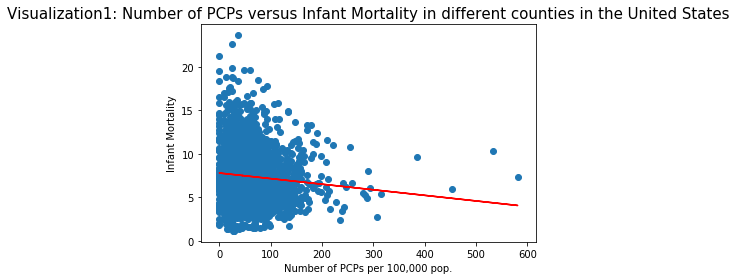

The regression line shows a negative correlation of -0.01


In [10]:
#scatter plot for PCPs per 100,000 pop. vs. infant mortality rate.
x= h_df['Prim_Care_Phys_Rate'] 
y= h_df['Infant_Mortality']


#regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.scatter(x, y)

plt.title('Visualization1: Number of PCPs versus Infant Mortality in different counties in the United States',fontsize=15)
plt.xlabel('Number of PCPs per 100,000 pop.')
plt.ylabel('Infant Mortality')
plt.show()

# Display the slope 
from statistics import mean

def best_fit_slope(x,y):
    m = (((mean(x)*mean(y)) - mean(x*y)) /
         ((mean(x)*mean(x)) - mean(x*x)))
    return m

m = best_fit_slope(x,y)
print('The regression line shows a negative correlation of', format(m, '.2f'))

Observation: 

The linear regression model shows a negative correlation of -0.0064 between number of primary care practitioners per 100,000 population and infant mortality. However, it is not a significant relationship to conclude that we have a higher mortality rate in areas/counties where there is less number of primary care practioners. 

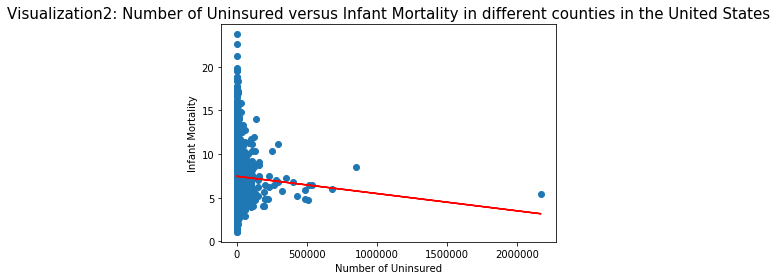

The regression line shows a negative correlation of -0.000002


In [11]:
#scatter plot for number of uninsured vs. infant mortality rate.
x= h_df['Uninsured']
y= h_df['Infant_Mortality']
plt.scatter(x, y)

#regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'r', label='fitted line')


plt.title('Visualization2: Number of Uninsured versus Infant Mortality in different counties in the United States',fontsize=15)
plt.xlabel('Number of Uninsured')
plt.ylabel('Infant Mortality')
plt.show()

# Display the slope 
from statistics import mean

def best_fit_slope(x,y):
    m = (((mean(x)*mean(y)) - mean(x*y)) /
         ((mean(x)*mean(x)) - mean(x*x)))
    return m

m = best_fit_slope(x,y)
print('The regression line shows a negative correlation of', format(m, '.6f'))

Observation:

The regression line shows a weak negative correlation of -1.98e-06 between number uninsured and infant mortality. However, it is not a significant relationship.

In [12]:
# list of sums of infant mortality when a health center is present and when not present.
#Based on the dataset documentation, 1 indicates No, and 2 indicates Yes.

sums= [sum(h_df[h_df['Community_Health_Center_Ind']== 2]['Infant_Mortality']), sum(h_df[h_df['Community_Health_Center_Ind']== 1]['Infant_Mortality'])]

No handles with labels found to put in legend.


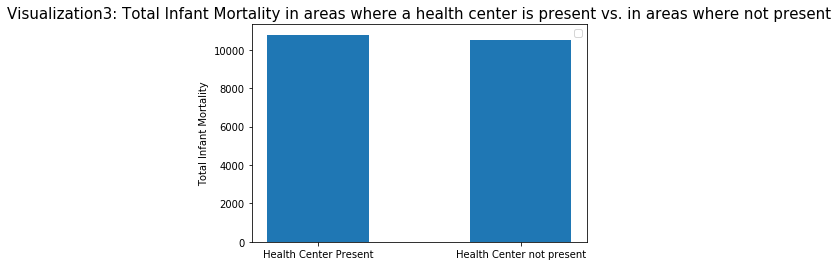

In [13]:
#barplot to show infant mortality in areas where a health center is present vs. when not present

labels= ['Health Center Present', 'Health Center not present'] #define labels in a list

x = np.arange(len(labels)) #position of the labels

fig, ax = plt.subplots()

ax.bar(x, sums, width= 0.5)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Infant Mortality')
ax.set_title('Visualization3: Total Infant Mortality in areas where a health center is present vs. in areas where not present', fontsize= 15)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# show the plot
plt.show()

Observation:

Areas/counties where a health center is present have almost the same infant mortality rate as when a health center is not present.

### Hypotheses2: Counties or Cities with higher rate of high blood pressure would have higher birth mortality rate

We will measure birth mortality here through <b>newborn mortality: IM_Neonatal</b>.

In [14]:
#Remove null values from dataframe while keeping original dataset to preserve valuable data for future hypothesis/questions
bp_df= df[df.IM_Neonatal > 0]
bp_df= bp_df[bp_df.High_Blood_Pres >0]
bp_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Infant_Mortality,Infant_Mortality_Ind,IM_Neonatal,IM_Neonatal_Ind,IM_Postneonatal,IM_Postneonatal_Ind,Total_Births,Total_Deaths,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,Prim_Care_Phys_Rate,Community_Health_Center_Ind
0,1,1,Autauga,Alabama,AL,29,5.9,3,3.0,3,3.0,4,3048.0,1867.0,24.5,29.1,26.6,14.2,5690,45.3,1
1,1,3,Baldwin,Alabama,AL,16,7.1,3,5.7,4,1.5,3,5471.0,4388.0,23.6,30.5,24.6,7.2,19798,67.0,1
7,1,15,Calhoun,Alabama,AL,6,9.5,4,6.1,4,3.4,4,4429.0,3915.0,27.0,33.2,25.5,11.2,16456,75.8,1
10,1,21,Chilton,Alabama,AL,32,10.5,4,7.9,4,2.6,4,2671.0,2065.0,31.2,26.5,30.0,6.0,6130,31.1,1
15,1,31,Coffee,Alabama,AL,32,2.9,3,1.4,3,1.4,3,2762.0,2210.0,25.5,31.3,23.0,10.3,6764,48.3,1


In [15]:
#bp_df statistics of our targeted columns
bp_df[['IM_Neonatal', 'High_Blood_Pres']].describe()

,IM_Neonatal,High_Blood_Pres
count,1488.000000,1488.000000
mean,4.636223,26.444556
std,1.792932,5.427034
min,0.500000,7.200000
25%,3.400000,22.800000
50%,4.400000,26.200000
75%,5.700000,29.800000
max,13.500000,47.100000


We can now see that our minimun, maximum, mean...etc. for the targeted columns in bp_df have no negative values, and this is because we removed the not available/not reported data

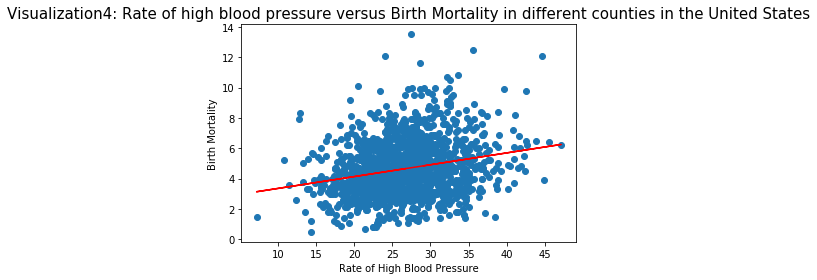

The regression line shows a positive correlation of 0.08


In [16]:
#scatter plot for number of high blood pressure vs. birth mortality rate 
x= bp_df['High_Blood_Pres']
y= bp_df['IM_Neonatal']
plt.scatter(x, y)

#regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'r', label='fitted line')


plt.title('Visualization4: Rate of high blood pressure versus Birth Mortality in different counties in the United States',fontsize=15)
plt.xlabel('Rate of High Blood Pressure')
plt.ylabel('Birth Mortality')
plt.show()

# Display the slope 
from statistics import mean

def best_fit_slope(x,y):
    m = (((mean(x)*mean(y)) - mean(x*y)) /
         ((mean(x)*mean(x)) - mean(x*x)))
    return m

m = best_fit_slope(x,y)
print('The regression line shows a positive correlation of', format(m, '.2f'))

Observation:

There is a positive correlation of 0.8 betwen rate of high blood pressure and birth mortality. Birth mortality is higher in areas/counties where we find higher rates of high blood pressure.

* We will now see how high blood pressure is distributed across favorable neonatal mortality versus unfavorable neonatal mortality 

In [17]:
#Based on the data description provided
#3: 'Favorable' 
#4: 'Unfavorable'
#High Blood Pressure statistics for favorable neonatal indicator 
bp_df[bp_df['IM_Neonatal_Ind']== 3]['High_Blood_Pres'].describe()

count    752.000000
mean      25.928989
std        5.455318
min        7.200000
25%       22.175000
50%       25.550000
75%       29.600000
max       45.600000
Name: High_Blood_Pres, dtype: float64

In [18]:
#High Blood Pressure statistics for unfavorable neonatal indicator
bp_df[bp_df['IM_Neonatal_Ind']== 4]['High_Blood_Pres'].describe()

count    736.000000
mean      26.971332
std        5.350555
min       10.800000
25%       23.400000
50%       26.750000
75%       30.100000
max       47.100000
Name: High_Blood_Pres, dtype: float64

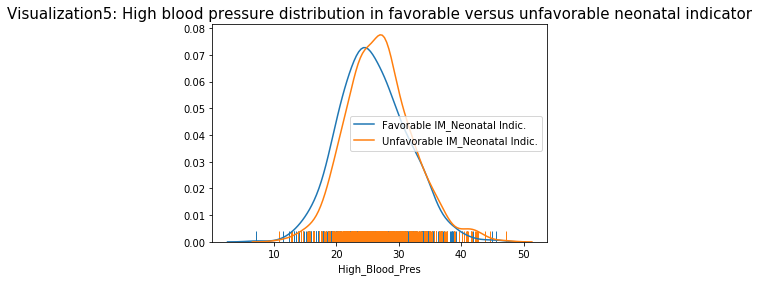

In [19]:
#High blood pressure distribution in favorable versus unfavorable neonatal indicator 
x = bp_df[bp_df['IM_Neonatal_Ind']== 3]['High_Blood_Pres']
y = bp_df[bp_df['IM_Neonatal_Ind']== 4]['High_Blood_Pres']
sns.distplot(x, hist=False, rug=True, label= 'Favorable IM_Neonatal Indic.');
sns.distplot(y, hist=False, rug=True, label= 'Unfavorable IM_Neonatal Indic.');
plt.title('Visualization5: High blood pressure distribution in favorable versus unfavorable neonatal indicator', fontsize= 15)
plt.legend();


Observation: 

Based on the statistics and the distribution plot, counties with a favorable neonatal mortality indicators seem to have a slightly lower mean, minimum, and maximum values than counties with an unfavorable neonatal indicators. 

### Question: Does access to health care and having preexisting conditions, specifically high blood pressure, affect birth mortality rate?


In [20]:
#define the dataframe, and make sure we have no unreported/unavailable values throughout the whole dataset
df2=df[['Total_Births', 'Total_Deaths', 'Obesity', 'High_Blood_Pres', 'Diabetes', 'Uninsured', 'Prim_Care_Phys_Rate', 'Community_Health_Center_Ind']]
df2= df2[df2.Total_Births>0]
df2= df2[df2.Total_Deaths>0]
df2= df2[df2.Obesity>0]
df2= df2[df2.High_Blood_Pres>0]
df2= df2[df2.Diabetes>0]
df2= df2[df2.Uninsured>0]
df2= df2[df2.Prim_Care_Phys_Rate>0]

#add a column of death rate where rate= total deaths/(total births+total deaths)
df2['Death_Percent']= df2.Total_Deaths/(df2.Total_Deaths+df2.Total_Births)*100 

df2.info() #general information to see how much data are we left with after cleaning.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 3140
Data columns (total 9 columns):
Total_Births                   1485 non-null float64
Total_Deaths                   1485 non-null float64
Obesity                        1485 non-null float64
High_Blood_Pres                1485 non-null float64
Diabetes                       1485 non-null float64
Uninsured                      1485 non-null int64
Prim_Care_Phys_Rate            1485 non-null float64
Community_Health_Center_Ind    1485 non-null int64
Death_Percent                  1485 non-null float64
dtypes: float64(7), int64(2)
memory usage: 116.0 KB


In [21]:
#df2 statistics 
df2.describe()

,Total_Births,Total_Deaths,Obesity,High_Blood_Pres,Diabetes,Uninsured,Prim_Care_Phys_Rate,Community_Health_Center_Ind,Death_Percent
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1.485000e+03,1485.000000,1485.000000,1485.000000
mean,8289.451852,4936.263300,23.836566,26.557374,7.348148,2.367755e+04,73.786195,1.452525,41.615292
std,19381.787231,8955.104049,4.484044,5.397420,2.212947,7.789337e+04,43.307854,0.497909,9.073110
min,215.000000,256.000000,4.200000,7.200000,0.500000,2.700000e+02,5.300000,1.000000,8.815233
25%,2276.000000,1758.000000,21.000000,22.900000,5.800000,3.731000e+03,47.100000,1.000000,36.188229
50%,3841.000000,2700.000000,24.000000,26.300000,7.100000,7.709000e+03,65.000000,1.000000,42.252215
75%,6723.000000,4364.000000,26.500000,29.900000,8.700000,1.742100e+04,90.600000,2.000000,47.883849
max,457033.000000,181018.000000,38.700000,47.100000,17.100000,2.167891e+06,581.200000,2.000000,71.036722


We can now see that our minimun, maximum, mean...etc. in df2 have no negative values, and this is because we removed the not available/not reported data

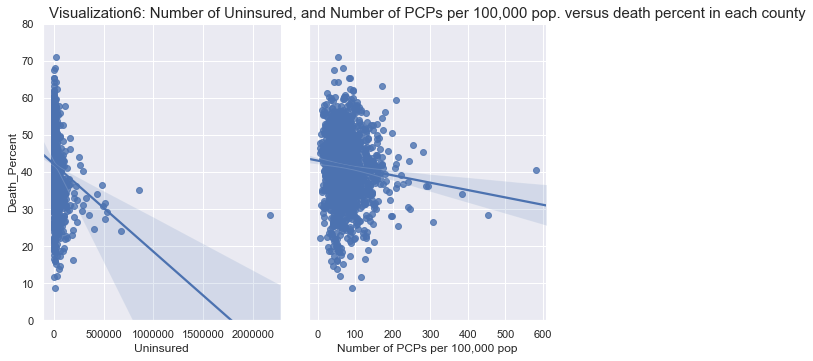

NOTES:
* In sns pairplots, the y axis label is mentioned once for all plots in the same horizontal line, and the x axis label is mentioned once for all plots in the same vertical line.
 
* In this case, both the number of uninsured in each county and number of PCPs per 100,000 pop. in each county have the same y axis label Death_Percent. 
 
Observations: 
The regression line shows a negative correlation of -0.00002 between the number of uninsured and death percent in each county.
The regression line shows a negative correlation of -0.02 between the number of primary care physicians per  100,000 population and death percent in each county.


In [22]:
#Pairplot: Access to health care vs death rate 
sns.set(color_codes=True)
sns.pairplot(df2, x_vars=['Uninsured','Prim_Care_Phys_Rate'], y_vars="Death_Percent", height=5, aspect=0.8, kind="reg");
plt.ylim(0,80)
plt.title('Visualization6: Number of Uninsured, and Number of PCPs per 100,000 pop. versus death percent in each county', fontsize= 15)
plt.xlabel('Number of PCPs per 100,000 pop')
plt.show()

#Note for the viewer
print('NOTES:')
print('* In sns pairplots, the y axis label is mentioned once for all plots in the same horizontal line, and the x axis label is mentioned once for all plots in the same vertical line.')
print(' ')
print('* In this case, both the number of uninsured in each county and number of PCPs per 100,000 pop. in each county have the same y axis label Death_Percent. ')
print(' ')
# Display the slope 
from statistics import mean

def best_fit_slope(x,y):
    m = (((mean(x)*mean(y)) - mean(x*y)) /
         ((mean(x)*mean(x)) - mean(x*x)))
    return m
x1= df2['Uninsured']
x2= df2['Prim_Care_Phys_Rate']
y= df2['Death_Percent']
m1 = best_fit_slope(x1,y)
m2 = best_fit_slope(x2, y)
print('Observations: ')
print('The regression line shows a negative correlation of', format(m1, '.5f'), 'between the number of uninsured and death percent in each county.')
print('The regression line shows a negative correlation of', format(m2, '.2f'), 'between the number of primary care physicians per  100,000 population and death percent in each county.')

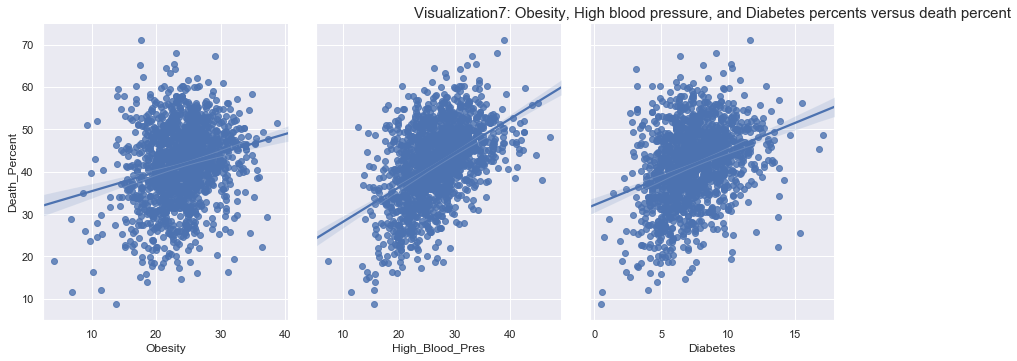

NOTES:

* In sns pairplots, the y axis label is mentioned once for all plots in the same horizontal line, and the x axis label is mentioned once for all plots in the same vertical line.
 
* In this case, Obesity, High blood pressure, and diabetes rates all have the same y axis label Death_Percent

* In the data description, no specifics were given about the unit of obesity, high blood pressure, and diabetes. Based on the minimum, maximum, mean...etc. of these feature, we assume they are percents in each county.

Observations:
 
The regression line for obesity rate and death percent shows a positive correlation of 0.45
The regression line for the high blood pressure rate and death percent shows a positive correlation of 0.81
The regression line for the diabetes rate and death percent shows a positive correlation of 1.29


In [23]:
#Pairplots: Preexisting conditions versus death rate 
sns.pairplot(df2, x_vars=['Obesity','High_Blood_Pres','Diabetes'], y_vars="Death_Percent",height=5, aspect=.8, kind="reg");
plt.title('Visualization7: Obesity, High blood pressure, and Diabetes percents versus death percent', fontsize= 15)
plt.show()

#Note for the viewer
print('NOTES:')
print('')
print('* In sns pairplots, the y axis label is mentioned once for all plots in the same horizontal line, and the x axis label is mentioned once for all plots in the same vertical line.')
print(' ')
print('* In this case, Obesity, High blood pressure, and diabetes rates all have the same y axis label Death_Percent')
print('')
print('* In the data description, no specifics were given about the unit of obesity, high blood pressure, and diabetes. Based on the minimum, maximum, mean...etc. of these feature, we assume they are percents in each county.')
print('')
#slope
x1= df2['Obesity']
x2= df2['High_Blood_Pres']
x3= df2['Diabetes']
y= df2['Death_Percent']
m1 = best_fit_slope(x1,y)
m2 = best_fit_slope(x2, y)
m3= best_fit_slope(x3, y)

print('Observations:')
print(' ')
print('The regression line for obesity rate and death percent shows a positive correlation of', format(m1, '.2f') )
print('The regression line for the high blood pressure rate and death percent shows a positive correlation of', format(m2, '.2f'))
print('The regression line for the diabetes rate and death percent shows a positive correlation of', format(m3, '.2f'))

Observations (cont.): 
    
Scatterplots show a strong positive correlation between each of the preexisting conditions and death percent.

High blood pressure versus death percent shows a strong positive correlation of 0.81, and it has the steepest regression line.

Diabetes versus death percent has the strongest positive correlation of 1.29.

### What I learned from this project:

Beside learning about the hidden patterns in this data, I learned that data analysis speaks better than just assumptions. It is good to make educated guesses, but it is more important to test them and follow through with research, in order to gain wisdom from the data, and be able to use to improve everyday life. I also learned a second library to do distribution plots in this project, and the difference between a correlation coefficient and a regression slope.

Sources:

https://slideplayer.com/slide/5068796/
    
https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

https://stackoverflow.com/questions/48370562/how-to-add-regression-line-and-regression-line-equation-on-graph

https://seaborn.pydata.org/tutorial/distributions.html

https://seaborn.pydata.org/tutorial/regression.html

https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/

https://stats.stackexchange.com/questions/32464/how-does-the-correlation-coefficient-differ-from-regression-slope

https://docs.python.org/3/tutorial/floatingpoint.html